# Kotrola kvalitete podataka

Prepoznavanje nedostajućih vrijednosti 
Rjesenje: nema nedostajućih vrijednosti

In [27]:
from pandas import DataFrame

path='dataset/student-por.csv'
df = pd.read_csv(path, sep=';')

df.isnull().values.any()

False

Rekodiranje nedostajućih vrijednosti  npr  .null. -> „missing“ 

Rj. Nema nedosajucih vrijednosti.

Prepoznavanje uniformnih ili nelogičnih distribucija

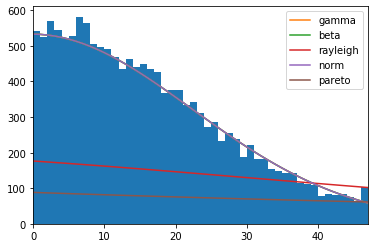

In [16]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 30000
x = scipy.arange(size)
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
h = plt.hist(y, bins=range(48))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper right')
plt.show()

Provjeriti / redizajnirati /odrediti ciljnu varijablu i njenu kvalitetu

In [ ]:
print("hello world")

# Statisticke analize uzorka podataka

Za svaku kategoričku varijablu prikazati distribucija frekvencije u grafu 

In [ ]:
print("hello world")

Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije

In [ ]:
print("hello world")

Izračunati korelacije svake varijable sa ciljnom varijablom

In [ ]:
print("hello world")

Izračunati korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3, (-3 do 3), >3 s ciljnom varijablom

In [ ]:
print("hello world")

Objasniti što ste spoznali vezano uz promatrani skup podataka  temeljem analiza iz točke 2

# IV, WoE izracuni

Izračunati IV, WoE za svaku varijablu i prikazati u Jupyter Notebooku

Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable

Grupirati razrede po kriteriju WoE za najjače varijable

Objasniti što ste spoznali temeljem ove analize (profili, uzroci, uzročno posljedične veze)

Predložite kako biste riješili problem vezano uz vaš skup podataka temeljem  IV, WoE analize (što bi trebalo mijenjati, raditi drugačije, gdje je problem uzrok problema, koji su rizični profili ... )